<a href="https://colab.research.google.com/github/annefrancine/ML---2021-2022/blob/main/Manipulation_des_donn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Version Python
from platform import python_version
print('Version Python:', python_version())

Version Python: 3.7.12


In [ ]:
import pandas as pd  
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

## Manipulation de données avec pandas

In [ ]:
# charger une base de données à partir d'un CSV 
df = pd.read_csv('https://raw.githubusercontent.com/LearnDataSci/articles/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners/IMDB-Movie-Data.csv',index_col="Title")

Il est possible d'avoir un aperçu des données en affichant seulement les 5 premières lignes du DataFrame. Pour cela, utiliser la méthode head en lui spécifiant en argument le nombre de lignes que vous voulez observer


In [ ]:
df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Il est possible d'avoir un aperçu des dernières lignes en utilisant la méthode tail.


In [ ]:
df.tail()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


La méthode info permet de connaître rapidement la catégorie des variables étudiées

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


shape renvoie un tuple contenant les dimensions du DataFrame

In [ ]:
df.shape

(1000, 11)

La méthode describe permet d’en savoir un peu plus sur les colonnes numériques d'un tableau. Elle retourne un résumé statistique des données numériques (min, max, moyenne, quantiles,..). C'est donc un outil très utile et fortement conseillé pour une première visualisation de la distribution des variables

In [ ]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


describe() peut également être utilisé sur une variable catégorielle pour obtenir le nombre de lignes, le nombre unique de catégories, la catégorie supérieure et la fréquence de la catégorie supérieure :

In [ ]:
df['Genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: Genre, dtype: object

.value_counts() peut nous indiquer la fréquence de toutes les valeurs d'une colonne :

In [ ]:
df['Genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Animation,Adventure,Comedy    27
Action,Adventure,Fantasy      27
Comedy,Drama                  27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: Genre, dtype: int64

## Handling duplicates

Ce jeu de données ne contient pas de lignes en double, mais il est toujours important de vérifier que vous n'agrégez pas de lignes en double.

Pour démontrer, doublons simplement nos films DataFrame en l'ajoutant à lui-même

In [ ]:
temp_df = df.append(df)

temp_df.shape

(2000, 11)

L'utilisation d'append() renverra une copie sans affecter le DataFrame d'origine. Nous capturons cette copie en temp donc nous ne travaillons pas avec les données réelles.

Maintenant, nous pouvons essayer de supprimer les doublons.

In [ ]:
temp_df = temp_df.drop_duplicates()

temp_df.shape

(1000, 11)

## Column cleanup

In [ ]:
df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Nous pouvons utiliser la méthode .rename() pour renommer certaines ou toutes les colonnes via un dict. Nous ne voulons pas de parenthèses, alors renommez-les :

In [ ]:
df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)


In [ ]:
df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

Mais que se passe-t-il si nous voulons mettre tous les noms en minuscules ? Au lieu d'utiliser .rename(), nous pourrions également définir une liste de noms dans les colonnes comme suit :

In [ ]:
df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']

df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

Au lieu de simplement renommer chaque colonne manuellement, nous pouvons effectuer une compréhension de liste :

In [ ]:
df.columns = [col.lower() for col in df]

df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

## Missing values

Il existe deux options pour traiter les valeurs NULL :

a) Se débarrasser des lignes ou des colonnes avec des valeurs NULL

b) Remplacer les valeurs nulles par des valeurs non nulles, une technique connue sous le nom d'imputation

Calculons le nombre total de valeurs nulles dans chaque colonne de notre ensemble de données. La première étape consiste à vérifier quelles cellules de notre DataFrame sont nulles :

In [ ]:
df.isnull()


,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,False,False,False,False,False,False,False,False,False,True,False
Hostel: Part II,False,False,False,False,False,False,False,False,False,False,False
Step Up 2: The Streets,False,False,False,False,False,False,False,False,False,False,False


 La fonction isnull() incluse dans le module pandas permet de détecter si des valeurs manquantes sont présentes. Elle prend en argument un tableau et retourne un nouveau tableau avec les variables booléennes: True, si la case du tableau originale est vide, False sinon.
 
 Pour compter le nombre de valeurs nulles dans chaque colonne, nous utilisons une fonction d'agrégat pour additionner :

In [ ]:
df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

Supprimer les valeurs nulles est assez simple :

In [ ]:
# df.dropna()


Cette opération supprimera toute ligne avec au moins une seule valeur null, mais elle renverra un nouveau DataFrame sans altérer l'original. Vous pouvez également spécifier inplace=True dans cette méthode.

Ainsi, dans le cas de notre ensemble de données, cette opération supprimerait 128 lignes où revenue_millions est null et 64 lignes où metascore est null. Cela semble évidemment être un gaspillage car il y a des données parfaitement bonnes dans les autres colonnes de ces lignes supprimées. C'est pourquoi nous examinerons ensuite l'imputation.

Outre la suppression de lignes, vous pouvez également supprimer des colonnes avec des valeurs nulles en définissant axis=1 :

In [ ]:
#df.dropna(axis=1)

## Imputation
L'imputation est une technique utilisée pour conserver des données précieuses qui ont des valeurs nulles.

Il peut y avoir des cas où la suppression de chaque ligne avec une valeur nulle supprime une trop grande partie de votre ensemble de données, nous pouvons donc à la place imputer cette valeur nulle avec une autre valeur, généralement la moyenne ou la médiane de cette colonne.

Regardons l'imputation des valeurs manquantes dans la colonne revenue_millions. Nous allons d'abord extraire cette colonne dans sa propre variable :

In [ ]:
revenue = df['revenue_millions']
revenue.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: revenue_millions, dtype: float64

Nous imputerons les valeurs manquantes des revenus en utilisant la moyenne. Voici la valeur moyenne :

In [ ]:
revenue_mean = revenue.mean()
revenue_mean

82.95637614678897

Avec la moyenne, remplissons les nulls en utilisant fillna() :

In [ ]:
revenue.fillna(revenue_mean, inplace=True)

Nous avons maintenant remplacé toutes les valeurs nulles par la moyenne de la colonne. Notez qu'en utilisant inplace=True, nous avons en fait affecté le df d'origine :

In [ ]:
df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

## DataFrame slicing, selecting, extracting

Par colonne :  Vous avez déjà vu comment extraire une colonne en utilisant des crochets comme ceci :

In [ ]:
genre_col = df['genre']
type(genre_col)

pandas.core.series.Series

Cela renverra une série. Pour extraire une colonne en tant que DataFrame, vous devez transmettre une liste de noms de colonnes. Dans notre cas, ce n'est qu'une seule colonne

In [ ]:
genre_col = df[['genre']]
type(genre_col)

pandas.core.frame.DataFrame

Comme il ne s'agit que d'une liste, il est facile d'ajouter un autre nom de colonne :

In [ ]:
subset = df[['genre', 'rating']]
subset.head()

,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2


Par ligne
Pour les lignes, nous avons deux options :

a).loc - localise par nom

b).iloc- localise par index numérique
N'oubliez pas que nous sommes toujours indexés par titre de film, donc pour utiliser .loc, nous lui donnons le titre d'un film :

In [ ]:
prom = df.loc["Prometheus"]
prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                              7
votes                                                          485820
revenue_millions                                               126.46
metascore                                                          65
Name: Prometheus, dtype: object

Par contre, avec iloc on lui donne l'indice numérique de Prometheus :

In [ ]:
prom = df.iloc[1]
prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                              7
votes                                                          485820
revenue_millions                                               126.46
metascore                                                          65
Name: Prometheus, dtype: object

Comment feriez-vous avec une liste? En Python, découpez simplement avec des crochets comme example_list[1:4]. Cela fonctionne de la même manière dans les pandas :

In [ ]:
movie_subset = df.loc['Prometheus':'Sing']
movie_subset

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [ ]:
movie_subset = df.iloc[1:4]
movie_subset

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


## Conditional selections

Par exemple, que se passe-t-il si nous voulons filtrer nos films  pour n'afficher que les films réalisés par Ridley Scott ou les films avec une note supérieure ou égale à 8,0 ?

In [ ]:
condition = (df['director'] == "Ridley Scott")
condition.head()

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
Name: director, dtype: bool

Semblable à isnull(), cela renvoie une série de valeurs True et False : True pour les films réalisés par Ridley Scott et False pour ceux qui ne sont pas réalisés par lui.

Nous voulons filtrer tous les films non réalisés par Ridley Scott, en d'autres termes, nous ne voulons pas des faux films. Pour renvoyer les lignes où cette condition est True, nous devons passer cette opération dans le DataFrame :

In [ ]:
df[df['director'] == "Ridley Scott"]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
The Counselor,522,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
A Good Year,531,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
Body of Lies,738,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


In [ ]:
df[df['rating'] >= 8.6].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
Kimi no na wa,97,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
Dangal,118,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN


In [ ]:
df[(df['director'] == 'Christopher Nolan') | (df['director'] == 'Ridley Scott')].head()
# |"ou" et & "et".

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


En utilisant la méthode isin(), nous pourrions cependant rendre cela plus concis :

In [ ]:
df[df['director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


Disons que nous voulons que tous les films sortis entre 2005 et 2010, aient une note supérieure à 8,0, mais réalisés en dessous du 25e centile de revenus.

In [ ]:
    df[
    ((df['year'] >= 2005) & (df['year'] <= 2010))
    & (df['rating'] > 8.0)
    & (df['revenue_millions'] < df['revenue_millions'].quantile(0.25))
]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


## Applying functions

nous créerions une fonction qui, lorsqu'elle est notée, détermine si elle est bonne ou mauvaise :

In [ ]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

Maintenant, nous voulons envoyer toute la colonne d'évaluation via cette fonction, ce que fait apply() :

In [ ]:
df["rating_category"] = df["rating"].apply(rating_function)

df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


rating_function renvoie une nouvelle série. Cette série est ensuite affectée à une nouvelle colonne appelée rating_category

Vous pouvez également utiliser des fonctions anonymes. Cette fonction lambda obtient le même résultat que rating_function :

In [ ]:
df["rating_category"] = df["rating"].apply(lambda x: 'good' if x >= 8.0 else 'bad')

df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


## Créer un plot

Pour les variables catégorielles, utilisez les graphiques à barres.

Pour les variables continues, utilisez les histogrammes, les nuages de points, les graphiques linéaires et les boîtes à moustaches.

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

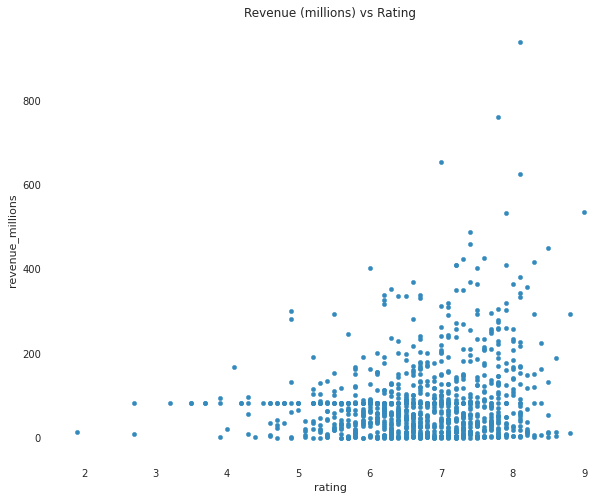

In [ ]:
df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

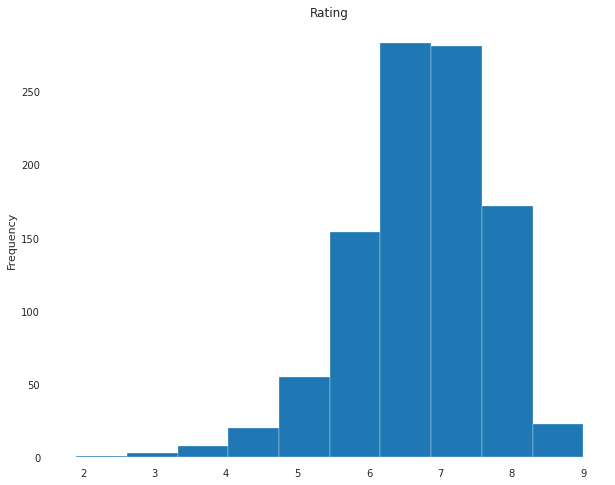

In [ ]:
df['rating'].plot(kind='hist', title='Rating');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


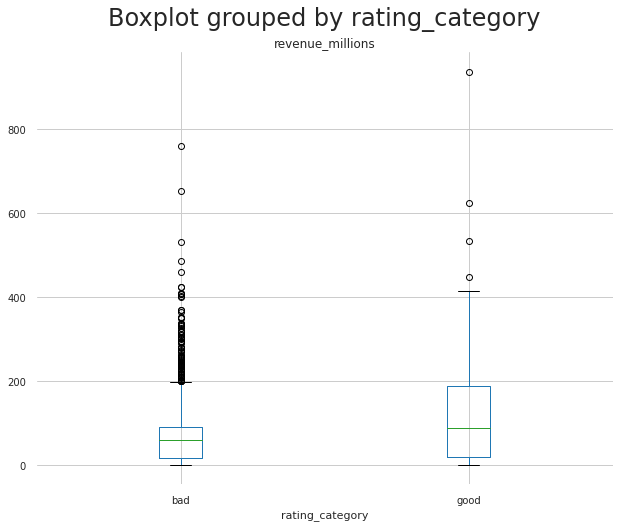

In [ ]:
df.boxplot(column='revenue_millions', by='rating_category');